## HR Analytics

In [21]:
import pandas as pd

In [22]:
data = pd.read_csv("HR_comma_sep.csv")

In [23]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [24]:
data.sales.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [25]:
data.salary.unique()

array(['low', 'medium', 'high'], dtype=object)

In [26]:
#salary- ordinal variable
#sales- nominal variable
data.salary = data.salary.astype("category")

In [27]:
data.salary = data.salary.cat.reorder_categories(['low','medium','high'])
data.salary.head()

0       low
1    medium
2    medium
3       low
4       low
Name: salary, dtype: category
Categories (3, object): [low, medium, high]

In [28]:
data.salary = data.salary.cat.codes
data.salary.head()

0    0
1    1
2    1
3    0
4    0
Name: salary, dtype: int8

In [29]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,0
1,0.80,0.86,5,262,6,0,1,0,sales,1
2,0.11,0.88,7,272,4,0,1,0,sales,1
3,0.72,0.87,5,223,5,0,1,0,sales,0
4,0.37,0.52,2,159,3,0,1,0,sales,0


In [30]:
#1-hot encoding
sales = pd.get_dummies(data.sales)

In [31]:
sales.head()

,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,1,0,0


In [32]:

sales = sales.drop("accounting", axis = 1)

In [33]:
sales.head()

,IT,RandD,hr,management,marketing,product_mng,sales,support,technical
0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,1,0,0


In [34]:
data = data.drop("sales", axis = 1)

In [35]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary
0,0.38,0.53,2,157,3,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1
2,0.11,0.88,7,272,4,0,1,0,1
3,0.72,0.87,5,223,5,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0


In [36]:
data=data.join(sales)

In [37]:
data.to_csv('HR_Analytics_Finalnew.csv')

In [38]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,IT,RandD,hr,management,marketing,product_mng,sales,support,technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,1,0,0


In [39]:
n_employees = len(data)
n_employees

14999

In [40]:
print(data.left.value_counts())

0    11428
1     3571
Name: left, dtype: int64


In [41]:
# Print the percentage of employees who left/stayed
print(data.left.value_counts()/n_employees * 100)

0    76.191746
1    23.808254
Name: left, dtype: float64


In [42]:
#null values in dataset
null_counts = data.isnull().sum()
null_counts

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
salary                   0
IT                       0
RandD                    0
hr                       0
management               0
marketing                0
product_mng              0
sales                    0
support                  0
technical                0
dtype: int64

In [43]:
target = data.left

In [44]:
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,IT,RandD,hr,management,marketing,product_mng,sales,support,technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,0,0,0,0,0,0,0,0,1,0
14995,0.37,0.48,2,160,3,0,1,0,0,0,0,0,0,0,0,0,1,0
14996,0.37,0.53,2,143,3,0,1,0,0,0,0,0,0,0,0,0,1,0
14997,0.11,0.96,6,280,4,0,1,0,0,0,0,0,0,0,0,0,1,0


In [45]:
features = data.drop("left",axis = 1)

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
target_train, target_test, feature_train, feature_test = train_test_split(target, features, test_size = 0.25, random_state = 42)

In [35]:
stayed = 11428
left = 3571
#sum of stayed and left
total = stayed + left
#gini index
gini = 2*(stayed/total)*(left/total)
gini

0.36279848707472784

### Decision Tree

In [48]:
# Import the classification algorithm
from sklearn.tree import DecisionTreeClassifier

# Initialize it and call model by specifying the random_state parameter
model = DecisionTreeClassifier(random_state=42, class_weight="balanced")

# Apply a decision tree model to fit features to the target
model.fit(feature_train, target_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [49]:
# Check the accuracy score of the prediction for the training set
model.score(feature_train,target_train)*100

# Check the accuracy score of the prediction for the test set
model.score(feature_test,target_test)*100 #This is clear case of overfitting

97.84

In [157]:
#if target is leavers, focus on false negative
#ie Recall score = TP/(TP+FN)
#Lower FN, higher Recall score
#Recall score- % of correct predictions among 1s (leavers)


#if target is stayers, focus on FP
#Specificity = TN/(TN+FP)
#Specificity - % of correct predictions among 0s (stayers)


#Even if target is leavers, you may still focus on false negative
#ie Precision score = TP/(TP+FP)
#Lower FP, higher Recall score
#Precision score- % of leavers in reality, among those predicted to leave
"""
Calculating accuracy metrics: precision
The Precision score is an important metric used to measure the accuracy of a classification algorithm. It is calculated as the fraction of True Positives over the sum of True Positives and False Positives, or 
# of True Positives
# of True Positives+# of False Positives

.
# of True Positives# of True Positives+# of False Positives.
we define True Positives as the number of employees who actually left, and were classified correctly as leaving 
we define False Positives as the number of employees who actually stayed, but were wrongly classified as leaving
If there are no False Positives, the precision score is equal to 1. If there are no True Positives, the recall score is equal to 0.
"""

'\nCalculating accuracy metrics: precision\nThe Precision score is an important metric used to measure the accuracy of a classification algorithm. It is calculated as the fraction of True Positives over the sum of True Positives and False Positives, or \n# of True Positives\n# of True Positives+# of False Positives\n\n.\n# of True Positives# of True Positives+# of False Positives.\nwe define True Positives as the number of employees who actually left, and were classified correctly as leaving \nwe define False Positives as the number of employees who actually stayed, but were wrongly classified as leaving\nIf there are no False Positives, the precision score is equal to 1. If there are no True Positives, the recall score is equal to 0.\n'

In [158]:
"""
Calculating accuracy metrics: recall
The Recall score is another important metric used to measure the accuracy of a classification algorithm. It is calculated as the** fraction of True Positives over the sum of True Positives and False Negatives**, or 
# of True Positives
# of True Positives+# of False Negatives

.
# of True Positives# of True Positives+# of False Negatives.
If there are no False Negatives, the recall score is equal to 1. If there are no True Positives, the recall score is equal to 0.
In this exercise, you will calculate the precision score (using the sklearn function recall_score) for your initial classification model.
"""

'\nCalculating accuracy metrics: recall\nThe Recall score is another important metric used to measure the accuracy of a classification algorithm. It is calculated as the** fraction of True Positives over the sum of True Positives and False Negatives**, or \n# of True Positives\n# of True Positives+# of False Negatives\n\n.\n# of True Positives# of True Positives+# of False Negatives.\nIf there are no False Negatives, the recall score is equal to 1. If there are no True Positives, the recall score is equal to 0.\nIn this exercise, you will calculate the precision score (using the sklearn function recall_score) for your initial classification model.\n'

In [162]:
# handeling class imbalance

In [163]:
"""
Balancing classes
It can significantly affect prediction results, as shown by the difference between the recall and accuracy scores. To solve the imbalance, equal weights are usually given to each class. Using the class_weight argument in sklearn's DecisionTreeClassifier, one can make the classes become "balanced"
"""

'\nBalancing classes\nIt can significantly affect prediction results, as shown by the difference between the recall and accuracy scores. To solve the imbalance, equal weights are usually given to each class. Using the class_weight argument in sklearn\'s DecisionTreeClassifier, one can make the classes become "balanced"\n'

In [166]:
"""
hyperparameter tuning may result in overfitting the test component, since it consists in tuning the model to get the best prediction results on the test set. Therefore, it is recommended to validate the model on different testing sets. K-fold cross-validation allows us to achieve this:
"""

'\nhyperparameter tuning may result in overfitting the test component, since it consists in tuning the model to get the best prediction results on the test set. Therefore, it is recommended to validate the model on different testing sets. K-fold cross-validation allows us to achieve this:\n'

In [167]:
# Import the function for implementing cross validation
from sklearn.model_selection import cross_val_score

# Use that function to print the cross validation score for 10 folds
print(cross_val_score(model,features,target,cv=10))

[0.9853431  0.98533333 0.974      0.96533333 0.96       0.97933333
 0.99       0.99333333 1.         1.        ]


In [168]:
"""
. In sklearn, you can use GridSearch to test different combinations of hyperparameters. Even better, you can use GridSearchCV() test different combinations and run cross-validation on them in one function!
"""

'\n. In sklearn, you can use GridSearch to test different combinations of hyperparameters. Even better, you can use GridSearchCV() test different combinations and run cross-validation on them in one function!\n'

In [51]:
# Generate values for maximum depth
depth = [i for i in range(5,21,1)]

# Generate values for minimum sample size
samples = [i for i in range(50,500,50)]

# Create the dictionary with parameters to be checked
parameters = dict(max_depth=depth, min_samples_leaf=samples)

In [39]:
"""
 Decision Trees are very popular because of their interpretability. Many models can provide accurate predictions, but Decision Trees can also quantify the effect of the different features on the target. Here, it can tell you which features have the strongest and weakest impacts on the decision to leave the company.
"""

'\n Decision Trees are very popular because of their interpretability. Many models can provide accurate predictions, but Decision Trees can also quantify the effect of the different features on the target. Here, it can tell you which features have the strongest and weakest impacts on the decision to leave the company.\n'

In [52]:
# import the GridSearchCV function
from sklearn.model_selection import GridSearchCV

# set up parameters: done
parameters = dict(max_depth=depth, min_samples_leaf=samples)

# initialize the param_search function using the GridSearchCV function, initial model and parameters above
param_search = GridSearchCV(model, parameters,cv = 10,scoring='accuracy',return_train_score= False)

# fit the param_search to the training dataset
param_search.fit(feature_train, target_train)

# print the best parameters found
print(param_search.best_params_)
print(param_search.cv_results_)
print(param_search.best_score_)
print(param_search.best_estimator_)

{'max_depth': 7, 'min_samples_leaf': 50}
{'mean_fit_time': array([0.01765392, 0.01505907, 0.01505911, 0.01615562, 0.01605365,
       0.0148634 , 0.01534951, 0.01615779, 0.0151557 , 0.01864996,
       0.01974649, 0.01725576, 0.01794708, 0.02023871, 0.01655486,
       0.0164536 , 0.01745503, 0.01635497, 0.01985142, 0.01975493,
       0.01755762, 0.01834228, 0.0179512 , 0.0156595 , 0.01565752,
       0.01615603, 0.01565123, 0.02114489, 0.02024319, 0.01885214,
       0.0179527 , 0.01765916, 0.01684957, 0.01606164, 0.01585557,
       0.01555872, 0.02173779, 0.02074554, 0.01875863, 0.01815672,
       0.0181463 , 0.01625307, 0.01585805, 0.01595633, 0.01555777,
       0.022539  , 0.02154157, 0.0197468 , 0.01954999, 0.01795115,
       0.0170541 , 0.01625259, 0.0163527 , 0.0164552 , 0.02353177,
       0.02233827, 0.02054274, 0.01914344, 0.01975141, 0.01775568,
       0.01645193, 0.01636522, 0.01754777, 0.02394459, 0.02154398,
       0.0199451 , 0.01855228, 0.01944795, 0.01685569, 0.01655695,
   

In [54]:
model_best =DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=7,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')
model_best.fit(feature_train, target_train)

# Calculate feature importances
feature_importances = model_best. feature_importances_

# Create a list of features: done
feature_list = list(features)

# Save the results inside a DataFrame using feature_list as an index
relative_importances = pd.DataFrame(index=feature_list, data=feature_importances, columns=["importance"])

# Sort values to learn most important features
relative_importances.sort_values(by="importance", ascending=False)



,importance
satisfaction_level,0.475605
time_spend_company,0.368257
last_evaluation,0.098420
average_montly_hours,0.038886
number_project,0.014152
technical,0.003096
hr,0.000961
salary,0.000622
promotion_last_5years,0.000000
Work_accident,0.000000


In [59]:
# select only features with relative importance higher than 1%
selected_features = relative_importances[relative_importances.importance>0.01]

# create a list from those features: done
selected_list = selected_features.index

# transform both features_train and features_test components to include only selected features
features_train_selected = feature_train[selected_list]
features_test_selected = feature_test[selected_list]
features_train_selected

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
14480,0.38,0.86,6,139,6
1934,0.78,0.93,4,225,5
7900,0.56,0.71,5,243,3
2952,0.96,0.62,4,217,2
4367,0.83,0.53,3,211,4
...,...,...,...,...,...
5191,0.52,0.96,4,246,3
13418,0.49,0.65,4,233,7
5390,0.66,0.73,5,249,2
860,0.79,1.00,4,218,5


In [60]:
# Import the function to calculate recall score
from sklearn.metrics import recall_score

# Import the function to calculate ROC/AUC score
from sklearn.metrics import roc_auc_score

# Initialize the best model using parameters provided in description
model_best1 = DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=7,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

# Fit the model using only selected features from training set: done
model_best1.fit(features_train_selected, target_train)

# Make prediction based on selected list of features from test set
prediction_best = model_best1.predict(features_test_selected)

# Print the general accuracy of the model_best
print(model_best1.score(features_test_selected, target_test) * 100)

# Print the recall score of the model predictions
print(recall_score(target_test, prediction_best) * 100)

# Print the ROC/AUC score of the model predictions
print(roc_auc_score(target_test, prediction_best) * 100)

96.64
90.96989966555184
94.69630629965289


In [61]:
# Import the graphical visualization export function
from sklearn.tree import export_graphviz

# Apply Decision Tree model to fit Features to the Target
model_best1.fit(features_train_selected,target_train)

# Export the tree to a dot file
export_graphviz(model_best1,"prunedtree1.dot")

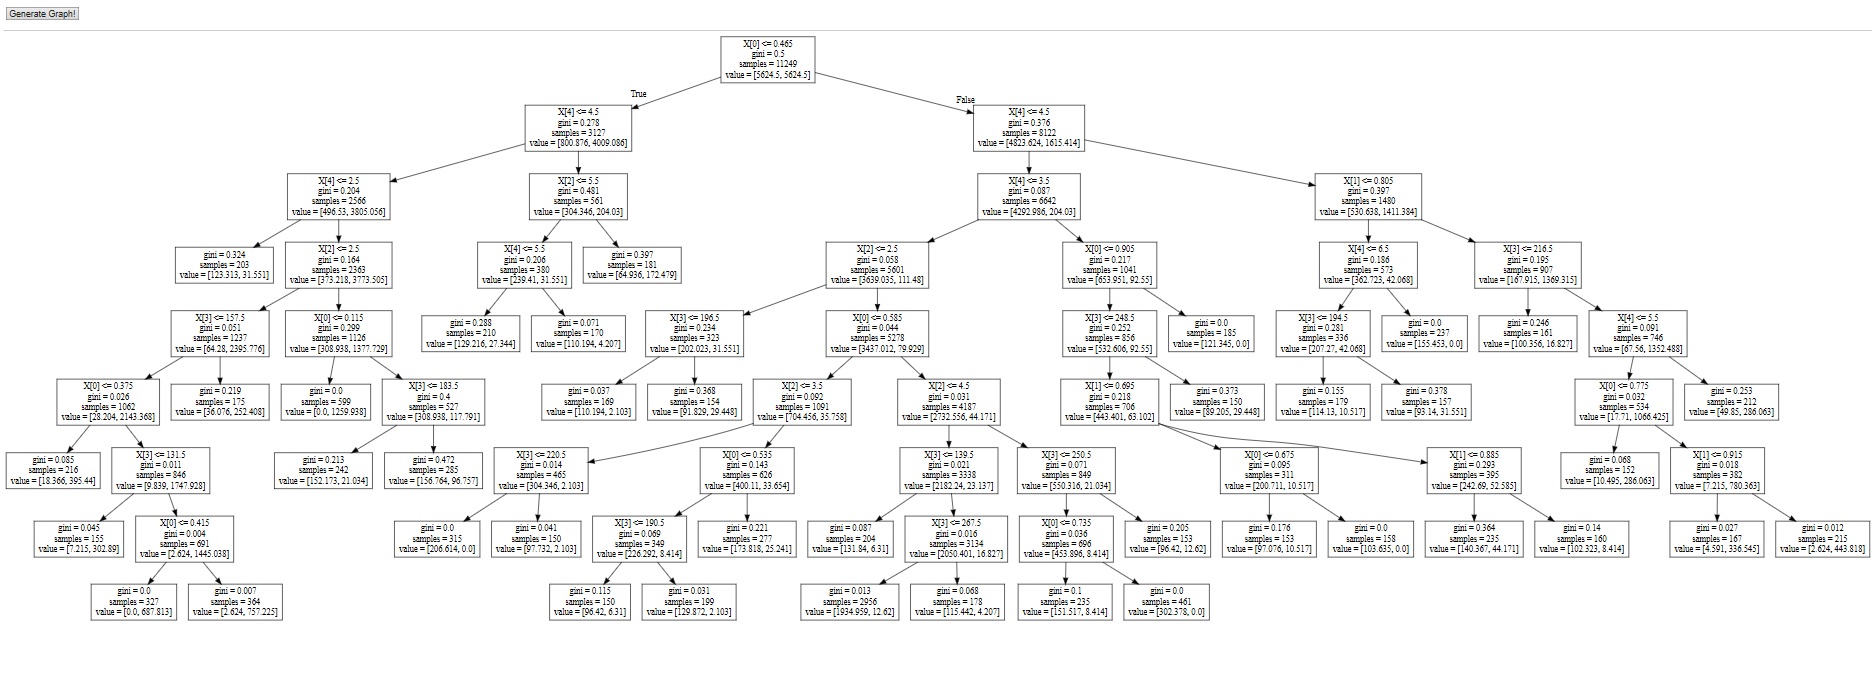

In [62]:
!pip install graphviz  

In [63]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/graphviz-2.38/release/bin/'

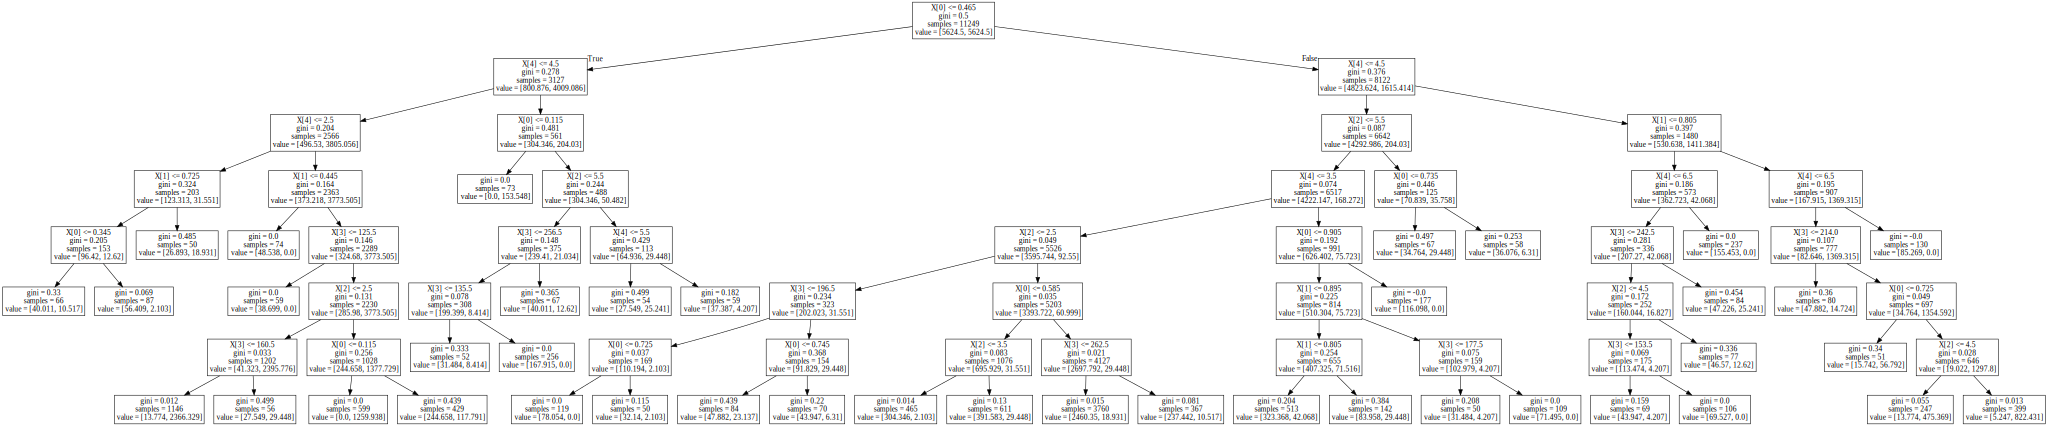

In [64]:
import graphviz
with open("prunedtree1.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [55]:
model_best =DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=150, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')
model_best.fit(feature_train, target_train)

# Calculate feature importances
feature_importances = model_best. feature_importances_

# Create a list of features: done
feature_list = list(features)

# Save the results inside a DataFrame using feature_list as an index
relative_importances = pd.DataFrame(index=feature_list, data=feature_importances, columns=["importance"])

# Sort values to learn most important features
relative_importances.sort_values(by="importance", ascending=False)

,importance
satisfaction_level,0.481865
time_spend_company,0.358989
last_evaluation,0.086395
average_montly_hours,0.037461
number_project,0.032849
technical,0.001550
salary,0.000446
management,0.000292
sales,0.000153
promotion_last_5years,0.000000


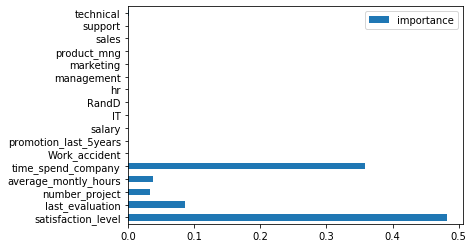

In [57]:
import matplotlib.pyplot as plt
relative_importances.plot(kind="barh")
plt.show()

In [64]:
# select only features with relative importance higher than 1%
selected_features = relative_importances[relative_importances.importance>0.01]

# create a list from those features: done
selected_list = selected_features.index

# transform both features_train and features_test components to include only selected features
features_train_selected = feature_train[selected_list]
features_test_selected = feature_test[selected_list]

In [65]:
features_train_selected.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
14480,0.38,0.86,6,139,6
1934,0.78,0.93,4,225,5
7900,0.56,0.71,5,243,3
2952,0.96,0.62,4,217,2
4367,0.83,0.53,3,211,4


In [102]:
# Initialize the best model using parameters provided in description
model_best1 = DecisionTreeClassifier(max_depth=2, min_samples_leaf=50, class_weight="balanced", random_state=42)

# Fit the model using only selected features from training set: done
model_best1.fit(features_train_selected, target_train)

# Make prediction based on selected list of features from test set
prediction_best = model_best1.predict(features_test_selected)

# Print the general accuracy of the model_best
print(model_best1.score(features_test_selected, target_test) * 100)

# Print the recall score of the model predictions
print(recall_score(target_test, prediction_best) * 100)

# Print the ROC/AUC score of the model predictions
print(roc_auc_score(target_test, prediction_best) * 100)

84.61333333333333
92.86510590858417
87.44201667668956


In [104]:
# Import the graphical visualization export function
from sklearn.tree import export_graphviz

# Apply Decision Tree model to fit Features to the Target
model_best1.fit(features_train_selected,target_train)

# Export the tree to a dot file
export_graphviz(model_best,"prunedtree1.dot")

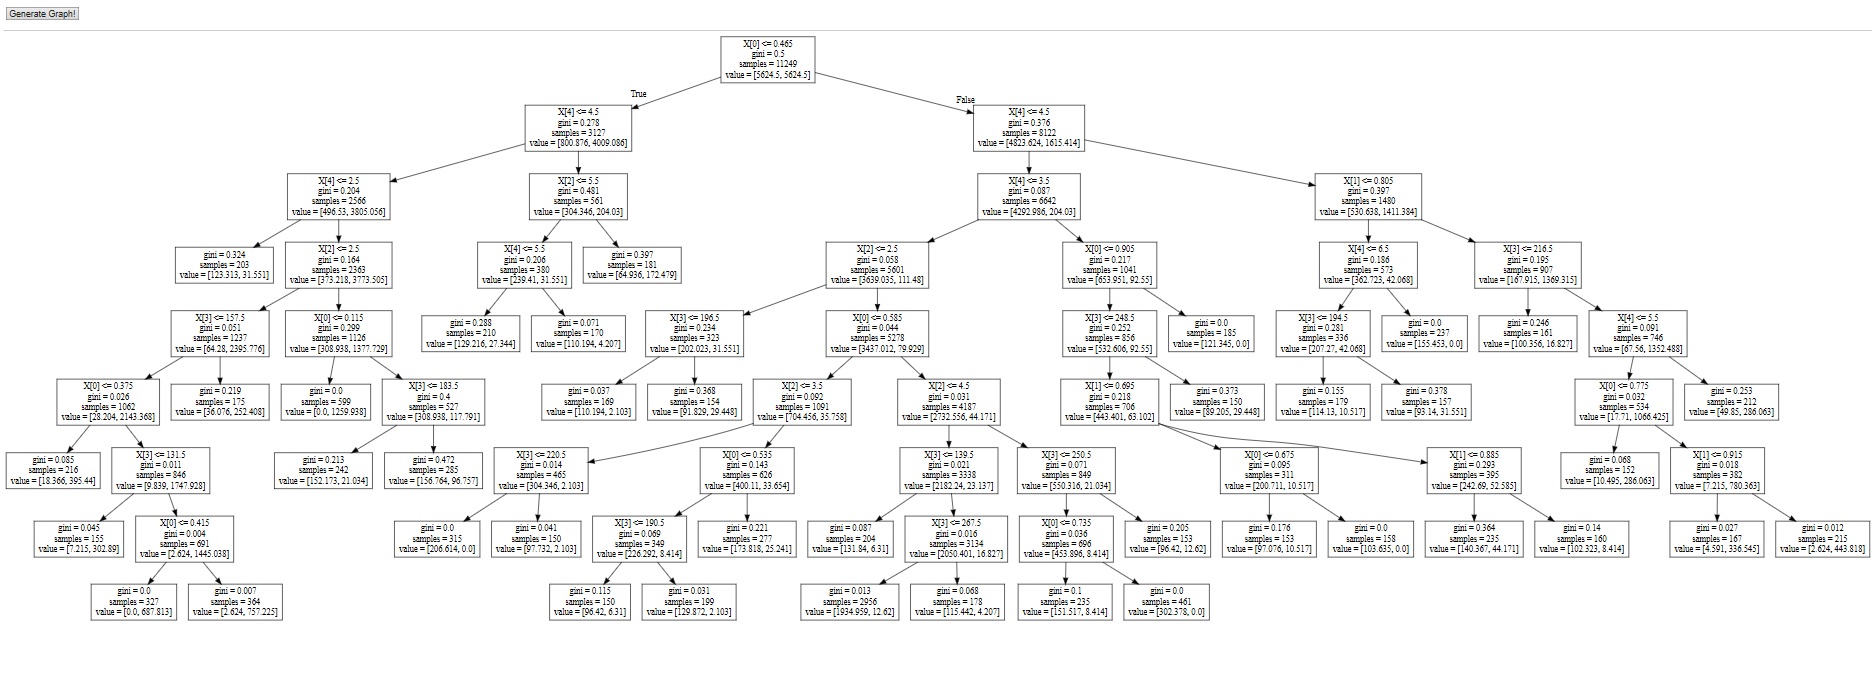

In [68]:
!pip install graphviz  

In [69]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/graphviz-2.38/release/bin/'

In [65]:
#for better interpretebility running on depth 3
model_best =DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')
model_best.fit(feature_train, target_train)

# Calculate feature importances
feature_importances = model_best. feature_importances_

# Create a list of features: done
feature_list = list(features)

# Save the results inside a DataFrame using feature_list as an index
relative_importances = pd.DataFrame(index=feature_list, data=feature_importances, columns=["importance"])

# Sort values to learn most important features
relative_importances.sort_values(by="importance", ascending=False)

,importance
satisfaction_level,0.498894
time_spend_company,0.398925
last_evaluation,0.097658
number_project,0.004523
hr,0.000000
support,0.000000
sales,0.000000
product_mng,0.000000
marketing,0.000000
management,0.000000


In [66]:
# select only features with relative importance higher than 1%
selected_features = relative_importances[relative_importances.importance>0.01]

# create a list from those features: done
selected_list = selected_features.index

# transform both features_train and features_test components to include only selected features
features_train_selected = feature_train[selected_list]
features_test_selected = feature_test[selected_list]
features_test_selected

,satisfaction_level,last_evaluation,time_spend_company
6723,0.65,0.96,2
6473,0.88,0.80,2
4679,0.69,0.98,2
862,0.41,0.47,3
7286,0.87,0.76,2
...,...,...,...
10371,0.99,0.37,6
12541,0.81,0.87,5
2656,0.67,0.59,3
6759,0.22,0.57,6


In [67]:
# Import the function to calculate recall score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Import the function to calculate ROC/AUC score
from sklearn.metrics import roc_auc_score

# Initialize the best model using parameters provided in description
model_best1 = DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

# Fit the model using only selected features from training set: done
model_best1.fit(features_train_selected, target_train)

# Make prediction based on selected list of features from test set
prediction_best = model_best1.predict(features_test_selected)

# Print the general accuracy of the model_best
print(model_best1.score(features_test_selected, target_test) * 100)

# Print the recall score of the model predictions
print(recall_score(target_test, prediction_best) * 100)

# Print the ROC/AUC score of the model predictions
print(roc_auc_score(target_test, prediction_best) * 100)

print(confusion_matrix(target_test,prediction_best))
print(classification_report(target_test,prediction_best))

90.85333333333332
93.08807134894091
91.61939494541332
[[2572  281]
 [  62  835]]
              precision    recall  f1-score   support

           0       0.98      0.90      0.94      2853
           1       0.75      0.93      0.83       897

    accuracy                           0.91      3750
   macro avg       0.86      0.92      0.88      3750
weighted avg       0.92      0.91      0.91      3750



In [68]:
# Import the graphical visualization export function
from sklearn.tree import export_graphviz

# Apply Decision Tree model to fit Features to the Target
model_best1.fit(features_train_selected,target_train)

# Export the tree to a dot file
export_graphviz(model_best1,"prunedtree1.dot")

In [69]:
# Initialize the best model using parameters provided in description
model_best1 = DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [70]:
# Import the graphical visualization export function
from sklearn.tree import export_graphviz

# Apply Decision Tree model to fit Features to the Target
model_best1.fit(features_train_selected,target_train)

# Export the tree to a dot file
export_graphviz(model_best1,"prunedtree2.dot")

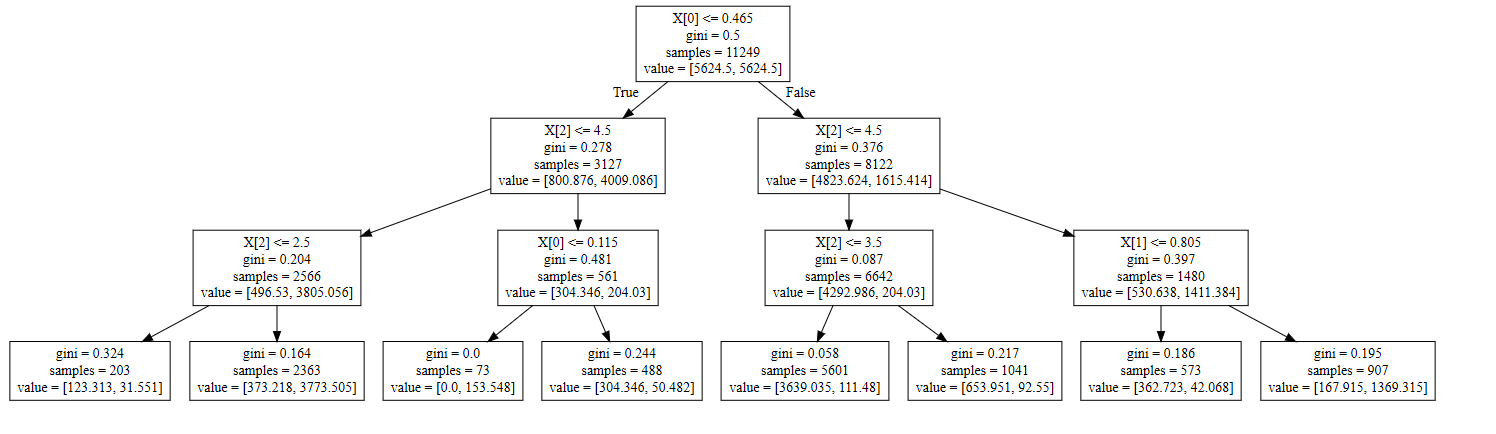

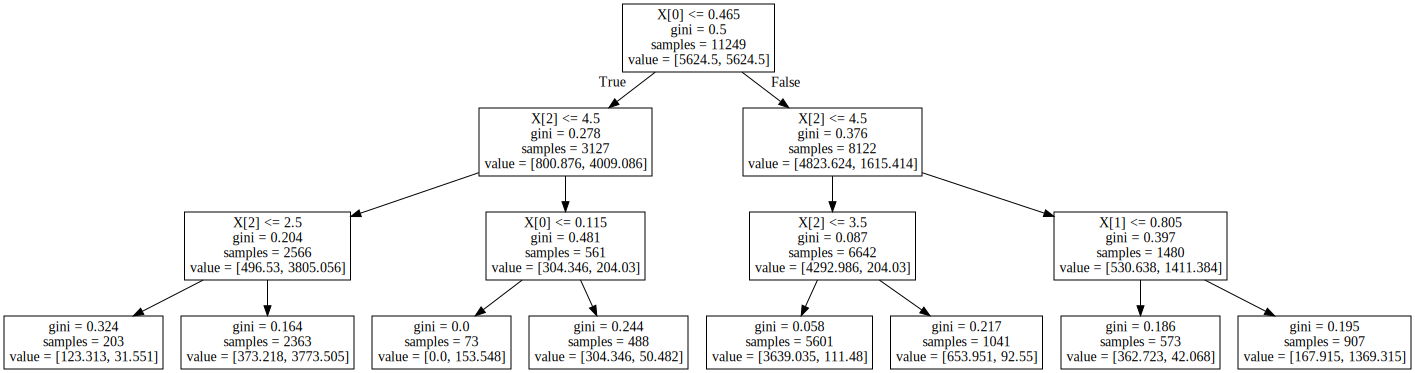

In [73]:
import graphviz
with open("prunedtree2.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

### Random Forest

In [48]:
#Random Forest on the dataset
#Using train test split
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt',
                               random_state=2)
rf.fit(feature_train, target_train)
y_pred = rf.predict(feature_test)

In [49]:
from sklearn import metrics
rf_cm = metrics.confusion_matrix(target_test,y_pred)
print(rf_cm)

[[2846    7]
 [  33  864]]


In [50]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(target_test,y_pred))
print(classification_report(target_test,y_pred))
print(accuracy_score(target_test, y_pred))

[[2846    7]
 [  33  864]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2853
           1       0.99      0.96      0.98       897

    accuracy                           0.99      3750
   macro avg       0.99      0.98      0.99      3750
weighted avg       0.99      0.99      0.99      3750

0.9893333333333333


In [73]:
#GridSearch with Random Forest - Hyperparameter tuning

rf = RandomForestClassifier()
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
grid = GridSearchCV(rf, param_grid=param_grid, cv= 10,scoring='accuracy',return_train_score=False)
grid.fit(feature_train, target_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             ii

In [74]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.9786647702017958
{'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 200}
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=8, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [74]:
#Random Forest on the dataset
#Using train test split
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=8, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
rf.fit(feature_train, target_train)
y_pred = rf.predict(feature_test)

In [75]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(target_test,y_pred))
print(classification_report(target_test,y_pred))
print(accuracy_score(target_test, y_pred))
print(roc_auc_score(target_test, prediction_best) * 100)

[[2843   10]
 [  83  814]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2853
           1       0.99      0.91      0.95       897

    accuracy                           0.98      3750
   macro avg       0.98      0.95      0.96      3750
weighted avg       0.98      0.98      0.97      3750

0.9752
92.95472582401672


### KNN 

In [76]:
from sklearn.neighbors import KNeighborsClassifier
knn =  KNeighborsClassifier(n_neighbors = 2)
knn.fit(feature_train, target_train)
knn_y_pred = knn.predict(feature_test)
knn_score = knn.score(feature_test,target_test)*100
print("K Nearest Neighbor Accuracy: {:.2f}%".format(knn_score))
print(classification_report(target_test,knn_y_pred))
print(confusion_matrix(target_test,knn_y_pred))
print(roc_auc_score(target_test, knn_y_pred) * 100)

K Nearest Neighbor Accuracy: 94.99%
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2853
           1       0.89      0.90      0.90       897

    accuracy                           0.95      3750
   macro avg       0.93      0.93      0.93      3750
weighted avg       0.95      0.95      0.95      3750

[[2756   97]
 [  91  806]]
93.22757128270776


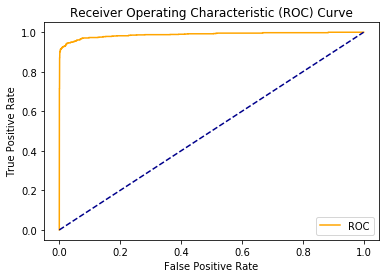

In [77]:
probs = rf.predict_proba(feature_test)  
probs = probs[:, 1]  
fper, tper, thresholds = roc_curve(target_test, probs) 
plot_roc_cur(fper, tper)

### Logistic Regression

C:\Users\shard\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\shard\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


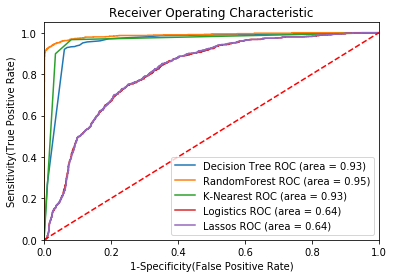

In [184]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

plt.figure()

# Add the models to the list that you want to view on the ROC plot
models = [
{
    'label': 'Decision Tree',
    'model': DecisionTreeClassifier(max_depth=5, min_samples_leaf=50, class_weight="balanced", random_state=42),
},
{
    'label': 'RandomForest',
    'model': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=8, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False),
},
{
    'label': 'K-Nearest',
    'model': KNeighborsClassifier(n_neighbors = 2),
},
{
    'label': 'Logistics',
    'model': LogisticRegression(),
},
{
    'label': 'Lassos',
    'model': LogisticRegression(C=1.0,penalty='l1'),
}    
 


]

# Below for loop iterates through your models list
for m in models:
    model = m['model'] # select the model
    model.fit(feature_train, target_train) # train the model
    y_pred=model.predict(feature_test) # predict the test data
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(target_test, model.predict_proba(feature_test)[:,1])
# Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(target_test,model.predict(feature_test))
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()   # Display


#### Lasso Regression

In [88]:
#Getting optimum C value for Lassos Regression

from sklearn.model_selection import train_test_split, cross_val_score 
from statistics import mean 

# List to maintain the cross-validation scores 
cross_val_scores_lasso = [] 
  
# List to maintain the different values of Lambda 
Lambda = [] 

#List to maintain different values of alpha
#alpha = []

# Loop to compute the cross-validation scores 
for i in range(1, 9): 
    
    sel_ = LogisticRegression(C=i*0.5, penalty='l1', tol=0.0925, solver='saga')
    sel_.fit(features_train_selected, target_train)
    scores = cross_val_score(sel_,features, target, cv= 10) 
    avg_cross_val_score = mean(scores)*100
    cross_val_scores_lasso.append(avg_cross_val_score) 
    Lambda.append(i * 0.5) 
  
# Loop to print the different values of cross-validation scores 
for i in range(0, len(Lambda)): 
    print(str(Lambda[i])+' : '+str(cross_val_scores_lasso[i])) 

0.5 : 76.07833899481733
1.0 : 76.09835233704548
1.5 : 76.07833899481733
2.0 : 76.07833899481733
2.5 : 76.07833899481733
3.0 : 76.09835233704548
3.5 : 76.08501010889339
4.0 : 76.08501010889339


In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
sel_ = SelectFromModel(LogisticRegression(C=1.0, penalty='l1'))
sel_.fit(feature_train, target_train)
print(sel_.get_support())
print(features_train_selected.columns)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True]
Index(['satisfaction_level', 'last_evaluation', 'time_spend_company'], dtype='object')


C:\Users\shard\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [55]:
from sklearn.linear_model import LogisticRegression
lasso=LogisticRegression(C=1.0,penalty='l1')
lasso.fit(features_train_selected,target_train)
lasso_y_pred = lasso.predict(features_test_selected)
print(classification_report(target_test,lasso_y_pred))
print(confusion_matrix(target_test,lasso_y_pred))


              precision    recall  f1-score   support

           0       0.79      0.91      0.85      2853
           1       0.46      0.25      0.32       897

    accuracy                           0.75      3750
   macro avg       0.63      0.58      0.59      3750
weighted avg       0.71      0.75      0.72      3750

[[2595  258]
 [ 675  222]]


C:\Users\shard\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [56]:
from sklearn.linear_model import LogisticRegression
logit=LogisticRegression()
logit.fit(feature_train,target_train)
logit_y_pred = logit.predict(feature_test)
print(classification_report(target_test,logit_y_pred))
print(confusion_matrix(target_test,logit_y_pred))


              precision    recall  f1-score   support

           0       0.82      0.93      0.87      2853
           1       0.61      0.36      0.45       897

    accuracy                           0.79      3750
   macro avg       0.71      0.64      0.66      3750
weighted avg       0.77      0.79      0.77      3750

[[2646  207]
 [ 577  320]]


C:\Users\shard\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### SVC

In [57]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(feature_train, target_train)
svc_y_pred = svclassifier.predict(feature_test)
svc_score = svclassifier.score(feature_test,target_test)
cm_svc = confusion_matrix(target_test,svc_y_pred)
print("SVC Accuracy: {:.2f}%".format(svc_score))
print(classification_report(target_test,svc_y_pred))
print(confusion_matrix(target_test,svc_y_pred))

SVC Accuracy: 0.77%
              precision    recall  f1-score   support

           0       0.80      0.94      0.86      2853
           1       0.55      0.25      0.34       897

    accuracy                           0.77      3750
   macro avg       0.67      0.59      0.60      3750
weighted avg       0.74      0.77      0.74      3750

[[2670  183]
 [ 673  224]]
